# Descriptive analysis

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
base_path = "."

In [3]:
filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-10-19.jsonl"

df = pd.read_json(filepath, lines=True)  # The file is JSONLines

In [4]:
# Check columns names and dimensions of the dataset
columns = ", ".join([column for column in df.columns.values])
print(f"Column names: {columns}\n")
print(f"Dataset dimensions (rows, columns): {df.shape}\n")

# Show a sample of the dataset
df.head()

Column names: alternate_identifiers, imprint, references, thesis, keywords, contributors, title, subjects, meeting, access_right, files, part_of, description, journal, communities, publication_date, owners, doi, license, notes, spam, recid, creators, resource_type, related_identifiers

Dataset dimensions (rows, columns): (1722305, 25)



,alternate_identifiers,imprint,references,thesis,keywords,contributors,title,subjects,meeting,access_right,...,publication_date,owners,doi,license,notes,spam,recid,creators,resource_type,related_identifiers
0,None,None,None,None,None,None,The Geodynamic World Builder,None,None,open,...,2020-06-18,[79483],10.5281/zenodo.3900603,LGPL-2.1-or-later,None,False,3900603,"[{'orcid': '0000-0003-0035-7723', 'affiliation...",{'type': 'software'},"[{'scheme': 'url', 'relation': 'isSupplementTo..."
1,None,None,None,None,"[Alignment, Ambiguous characters, InDel, Maxim...",None,Evidence of Absence Treated as Absence of Evid...,None,"{'dates': 'October 5-8, 2016', 'place': 'Bueno...",open,...,2019-08-08,[70030],10.5281/zenodo.3363990,CC-BY-4.0,Funding was provided by the Fundação de Amparo...,False,3363990,"[{'orcid': '0000-0001-9858-4515', 'affiliation...","{'subtype': 'article', 'type': 'publication'}",None
2,None,None,None,None,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",None,FIGURE 13 in Exploring species diversity and h...,None,None,open,...,2019-08-07,[1161],10.5281/zenodo.3363503,notspecified,None,False,3363503,"[{'name': 'Kirichenko, Natalia'}, {'name': 'Tr...","{'subtype': 'figure', 'type': 'image'}","[{'scheme': 'url', 'relation': 'isCitedBy', 'i..."
3,None,None,None,None,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",None,FIGURE 3 in Two new species of Panaietis (Cope...,None,None,open,...,2019-08-07,[1161],10.5281/zenodo.3363619,notspecified,None,False,3363619,"[{'name': 'Uyeno, Daisuke'}]","{'subtype': 'figure', 'type': 'image'}","[{'scheme': 'url', 'relation': 'isCitedBy', 'i..."
4,"[{'scheme': 'lsid', 'identifier': 'urn:lsid:pl...",None,"[{'raw_reference': 'Bolivar, I. (1887) Essai s...",None,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",None,A new species of the genus Criotettix Bolivar ...,None,None,closed,...,2019-08-08,[1161],10.11646/zootaxa.4652.2.13,None,None,False,3363729,"[{'name': 'Zhang, Yu-Long'}, {'name': 'Li, Xin...","{'subtype': 'article', 'type': 'publication'}","[{'scheme': 'url', 'relation': 'hasPart', 'ide..."


In [5]:
# Check data type
df.dtypes

alternate_identifiers    object
imprint                  object
references               object
thesis                   object
keywords                 object
contributors             object
title                    object
subjects                 object
meeting                  object
access_right             object
files                    object
part_of                  object
description              object
journal                  object
communities              object
publication_date         object
owners                   object
doi                      object
license                  object
notes                    object
spam                       bool
recid                     int64
creators                 object
resource_type            object
related_identifiers      object
dtype: object

False    1684521
True       37784
Name: spam, dtype: int64


<AxesSubplot:>

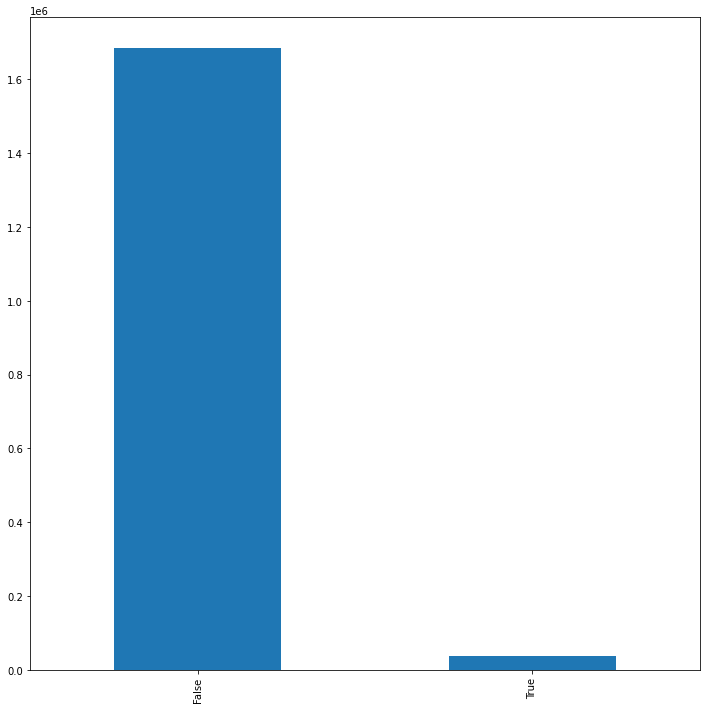

In [6]:
spam_ham = df.spam.value_counts()
print(spam_ham)
spam_ham.plot(kind='bar', figsize=(12,12))

In [7]:
def spam_ham_df(shdf):
    return shdf[shdf['spam']==True], shdf[shdf['spam']==False]

In [8]:
spam_df, ham_df = spam_ham_df(df)

# Check missing values by class
for column in df.columns.values:
    print(f"[Spam] Column {column}: {spam_df[column].isnull().mean().round(4) * 100}")
    print(f"[Ham] Column {column}: {ham_df[column].isnull().mean().round(4) * 100}")
    print(" ----- ")


[Spam] Column alternate_identifiers: 99.97
[Ham] Column alternate_identifiers: 79.51
 ----- 
[Spam] Column imprint: 98.98
[Ham] Column imprint: 81.8
 ----- 
[Spam] Column references: 99.14
[Ham] Column references: 92.97999999999999
 ----- 
[Spam] Column thesis: 99.88
[Ham] Column thesis: 99.7
 ----- 
[Spam] Column keywords: 49.1
[Ham] Column keywords: 43.81
 ----- 
[Spam] Column contributors: 98.83999999999999
[Ham] Column contributors: 98.36
 ----- 
[Spam] Column title: 0.0
[Ham] Column title: 0.0
 ----- 
[Spam] Column subjects: 99.00999999999999
[Ham] Column subjects: 99.06
 ----- 
[Spam] Column meeting: 98.50999999999999
[Ham] Column meeting: 96.76
 ----- 
[Spam] Column access_right: 0.0
[Ham] Column access_right: 0.0
 ----- 
[Spam] Column files: 0.0
[Ham] Column files: 0.0
 ----- 
[Spam] Column part_of: 98.99
[Ham] Column part_of: 98.91
 ----- 
[Spam] Column description: 0.0
[Ham] Column description: 0.0
 ----- 
[Spam] Column journal: 97.58
[Ham] Column journal: 76.99000000000001
 

It can be observed that `alternate_identifiers`, `imprint`, `references`, `thesis`, `contributors`, `subjects`, `meeting`, `part_of`, `journal`, `notes`, and `related_identifiers` will not be useful since there is a significant amount of data missing for both classes. In addition, `publication_date` is not useful since it can be chosen at random or simply follow chronologically(i.e. choose the current day), neither is `owners` since it is not possible to enrich the current dataset with user data. Since Zenodo mints DOIs, this value is not useful either, only a small minority of ham data will have an externally managed DOI.

In [9]:
# Chained operation because we do not drop `inplace`

to_drop = [
    "alternate_identifiers", "imprint", "references", "thesis", "contributors", 
    "subjects", "meeting", "part_of", "journal", "notes", "related_identifiers",
    "publication_date", "owners", "doi"
]
clean_df = df
for column in to_drop:
    clean_df = clean_df.drop(column, axis='columns')
clean_df.head()

,keywords,title,access_right,files,description,communities,license,spam,recid,creators,resource_type
0,None,The Geodynamic World Builder,open,"[{'filetype': 'pdf', 'size': 808178, 'filename...",<p>The Geodynamic World Builder (GWB) is an op...,[geodynamics],LGPL-2.1-or-later,False,3900603,"[{'orcid': '0000-0003-0035-7723', 'affiliation...",{'type': 'software'}
1,"[Alignment, Ambiguous characters, InDel, Maxim...",Evidence of Absence Treated as Absence of Evid...,open,"[{'filetype': 'fasta', 'size': 32888, 'filenam...","<p>Enclosed are the figures, tables, and suppl...",None,CC-BY-4.0,False,3363990,"[{'orcid': '0000-0001-9858-4515', 'affiliation...","{'subtype': 'article', 'type': 'publication'}"
2,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",FIGURE 13 in Exploring species diversity and h...,open,"[{'filetype': 'png', 'size': 7640839, 'filenam...",FIGURE 13. Mines of Phyllonorycter spp. from t...,[biosyslit],notspecified,False,3363503,"[{'name': 'Kirichenko, Natalia'}, {'name': 'Tr...","{'subtype': 'figure', 'type': 'image'}"
3,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",FIGURE 3 in Two new species of Panaietis (Cope...,open,"[{'filetype': 'png', 'size': 299892, 'filename...","FIGURE 3. Panaietis bobocephala sp. nov., adul...",[biosyslit],notspecified,False,3363619,"[{'name': 'Uyeno, Daisuke'}]","{'subtype': 'figure', 'type': 'image'}"
4,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",A new species of the genus Criotettix Bolivar ...,closed,[],"Zhang, Yu-Long, Li, Xin-Jiang, Zhi, Yong-Chao ...",[biosyslit],None,False,3363729,"[{'name': 'Zhang, Yu-Long'}, {'name': 'Li, Xin...","{'subtype': 'article', 'type': 'publication'}"


# Feature Extraction and descriptive analysis

In [10]:
def process_list(list_values, column_name):
    if not list_values:
        return 0
    elif isinstance(list_values, list):
        return len(list_values)
    else:
        raise Exception(f"column_name is not a list nor None: {list_values}")

## Keywords

In [11]:
clean_df['num_keywords'] = clean_df.apply(lambda x: process_list(x['keywords'], 'keywords'), axis=1)
clean_df.num_keywords.value_counts()

0      792822
5      315894
8      168923
1      120781
4       53233
        ...  
94          1
110         1
96          1
107         1
269         1
Name: num_keywords, Length: 124, dtype: int64

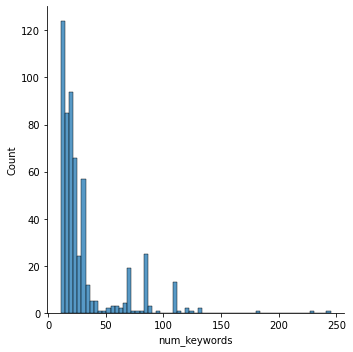

In [12]:
ky_spam_df, ky_ham_df = spam_ham_df(clean_df)
ky_hist_ham = ky_spam_df[ky_spam_df["num_keywords"] > 10]
sns.displot(ky_hist_ham, x="num_keywords", label="ham")

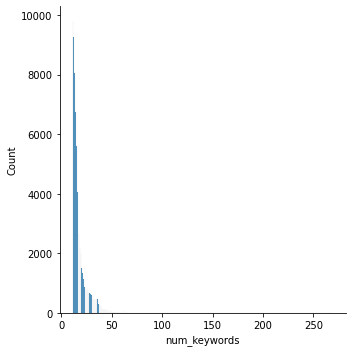

In [13]:
ky_hist_spam = ky_ham_df[ky_ham_df["num_keywords"] > 10]
sns.displot(ky_hist_spam, x="num_keywords", label="spam")

In [14]:
clean_df.loc[clean_df.num_keywords >= 10, "num_keywords"] = 10
clean_df.num_keywords.value_counts().sort_index()

0     792822
1     120781
2      48590
3      33854
4      53233
5     315894
6      26357
7      43354
8     168923
9      42651
10     75846
Name: num_keywords, dtype: int64

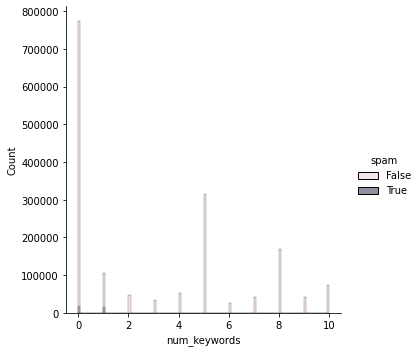

In [15]:
sns.displot(clean_df, x="num_keywords", hue_norm=(0,1), hue="spam")

In [16]:
# Using estimator from searborn e.g. `sns.barplot(data=df, x="num_keywords", y="spam", estimator=sum)`
# is too slow, therefore new df are created for plotting purposes

**Important note**: Since the dataset is highly imbalanced towards the ham class, it maked difficult to see graphically the comparason between classed. Therefore, we set `normalize=True` in order to get percentages per class.

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

def barplot_by_spam(plot_df, feature, rotate_labels=False):
    plt_spam_df, plt_ham_df = spam_ham_df(plot_df)
        
    plt_data = {
        'feature': [
            *plt_spam_df[feature].value_counts().sort_index().keys().array,
            *plt_ham_df[feature].value_counts().sort_index().keys().array
        ],
        'spam': [
            *[True for spam in range(len(plt_spam_df[feature].value_counts().sort_index().keys()))],
            *[False for spam in range(len(plt_ham_df[feature].value_counts().sort_index().keys()))],
        ],
        'total': [
            *plt_spam_df[feature].value_counts(normalize=True).sort_index().array,
            *plt_ham_df[feature].value_counts(normalize=True).sort_index().array
        ]
    }

    total_df = pd.DataFrame(data=plt_data)
    barplt = sns.barplot(x="feature", y="total", hue="spam", data=total_df)
    if rotate_labels:
        barplt.set_xticklabels(barplt.get_xticklabels(), rotation=90)

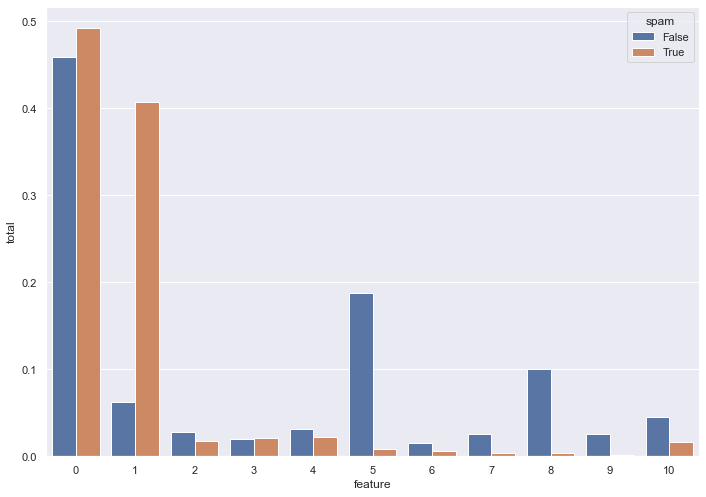

In [18]:
barplot_by_spam(clean_df, 'num_keywords')

## Access right

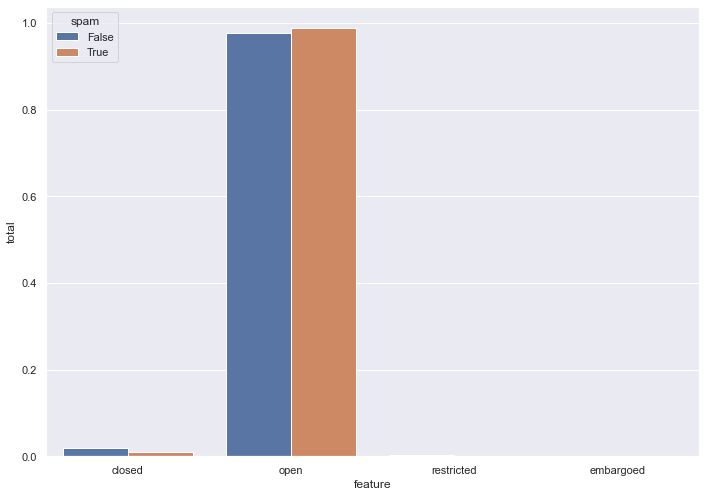

In [19]:
barplot_by_spam(clean_df, 'access_right')

## Files

In [20]:
clean_df['num_files'] = df.apply(lambda x: process_list(x['files'], 'files'), axis=1)
clean_df.num_files.value_counts().sort_index()

0          38672
1        1603692
2          25113
3          21956
4           3861
          ...   
7063           1
8076           1
8100           1
9416           1
14402          1
Name: num_files, Length: 604, dtype: int64

In [21]:
clean_df.loc[(clean_df.num_files < 10) & (clean_df.num_files >= 4), "num_files"] = 4
clean_df.loc[(clean_df.num_files < 30) & (clean_df.num_files >= 10), "num_files"] = 5
clean_df.loc[(clean_df.num_files < 50) & (clean_df.num_files >= 30), "num_files"] = 6
clean_df.loc[clean_df.num_files >= 50, "num_files"] = 7
clean_df.num_files.value_counts().sort_index()

0      38672
1    1603692
2      25113
3      21956
4      13626
5       9161
6       7977
7       2108
Name: num_files, dtype: int64

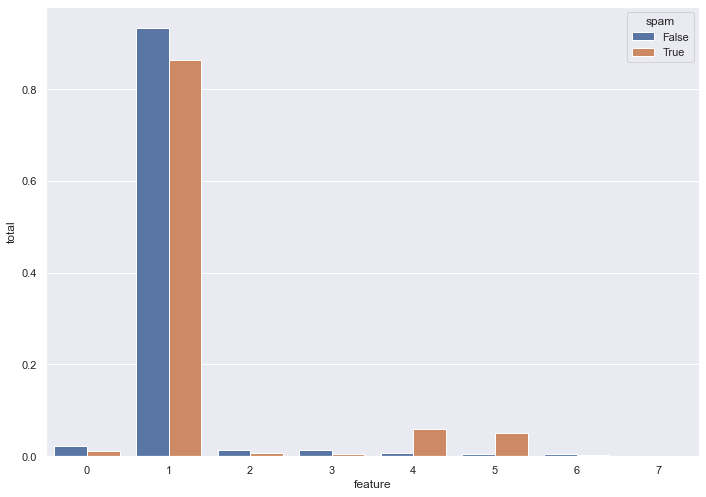

In [22]:
barplot_by_spam(clean_df, 'num_files')

In [23]:
image_formats = ['jpg', 'jpeg', 'png', 'bmp', 'gif', 'tiff', 'exif', 'ppm', 'pgm', 'pbm', 'pnm', 'webp', 'svg']

def has_image(files):
    for file in files:
        if file['filetype'] in image_formats:
            return True
    return False

In [24]:
clean_df['has_image'] = df.apply(lambda x: has_image(x['files']), axis=1)
clean_df.has_image.value_counts()

False    1141591
True      580714
Name: has_image, dtype: int64

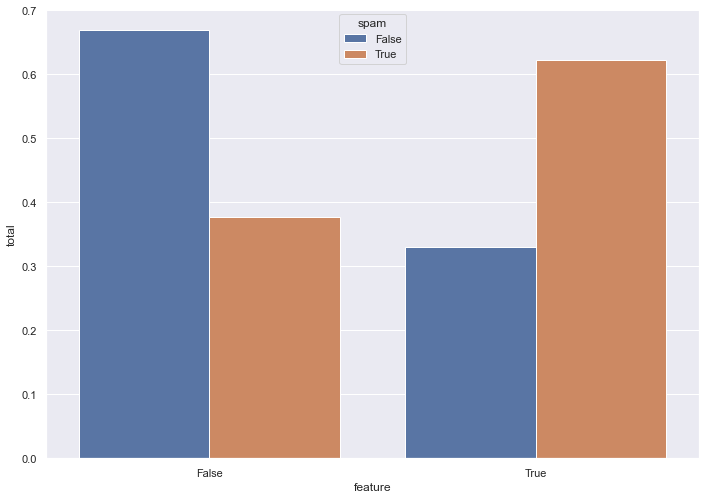

In [25]:
barplot_by_spam(clean_df, 'has_image')

## Communities

In [26]:
clean_df['num_communities'] = df.apply(lambda x: process_list(x['communities'], 'communities'), axis=1)
clean_df.num_communities.value_counts()

0    922174
1    776287
2     18203
3      4544
4       663
7       393
5        28
6        12
8         1
Name: num_communities, dtype: int64

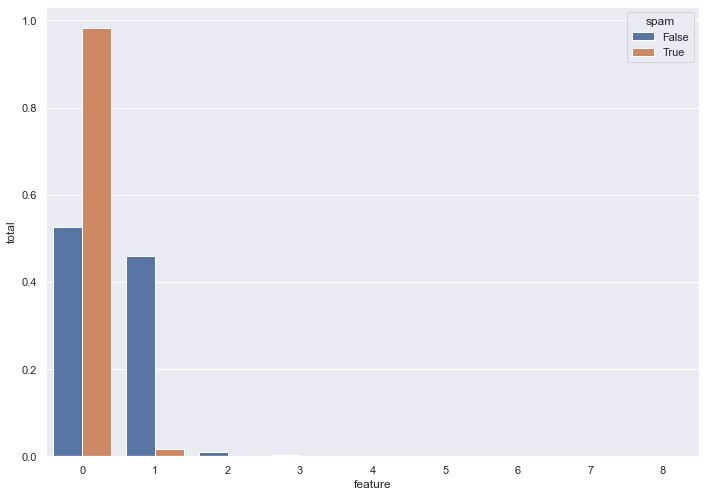

In [27]:
barplot_by_spam(clean_df, 'num_communities')

## Creators

In [28]:
def has_orcid(creators):
    for creator in creators:
        if creator.get('affiliation'):
            return True
    return False

def has_affiliation(creators):
    for creator in creators:
        if creator.get('orcid'):
            return True
    return False

In [29]:
clean_df['num_creators'] = df.apply(lambda x: process_list(x['creators'], 'creators'), axis=1)
clean_df.num_creators.value_counts()

1      1072290
2       251970
3       158710
4        87078
5        48342
        ...   
132          1
133          1
139          1
143          1
436          1
Name: num_creators, Length: 142, dtype: int64

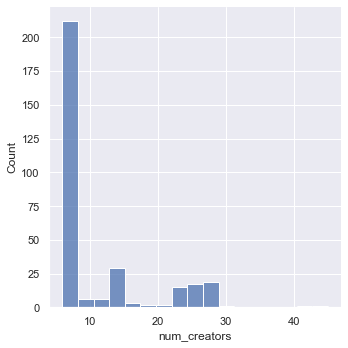

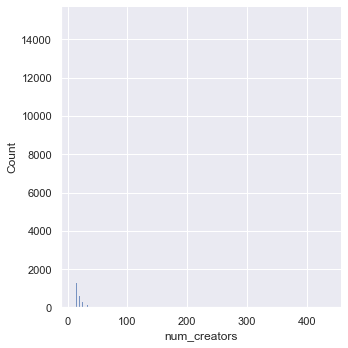

In [30]:
ncr_spam_df, ncr_ham_df = spam_ham_df(clean_df)
sns.displot(ncr_spam_df[ncr_spam_df["num_creators"] > 5], x="num_creators")
sns.displot(ncr_ham_df[ncr_ham_df["num_creators"] > 10], x="num_creators")

In [31]:
clean_df.loc[(clean_df["num_creators"] > 5) & (clean_df["num_creators"] <= 7), "num_creators"] = 6
clean_df.loc[(clean_df["num_creators"] > 7) & (clean_df["num_creators"] <= 10), "num_creators"] = 7
clean_df.loc[clean_df.num_creators > 10, "num_creators"] = 8
clean_df.num_creators.value_counts().sort_index()

1    1072290
2     251970
3     158710
4      87078
5      48342
6      43236
7      23772
8      36907
Name: num_creators, dtype: int64

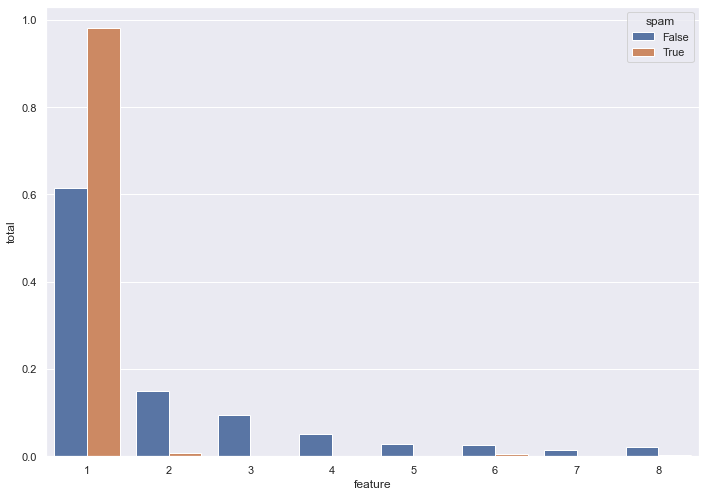

In [32]:
barplot_by_spam(clean_df, 'num_creators')

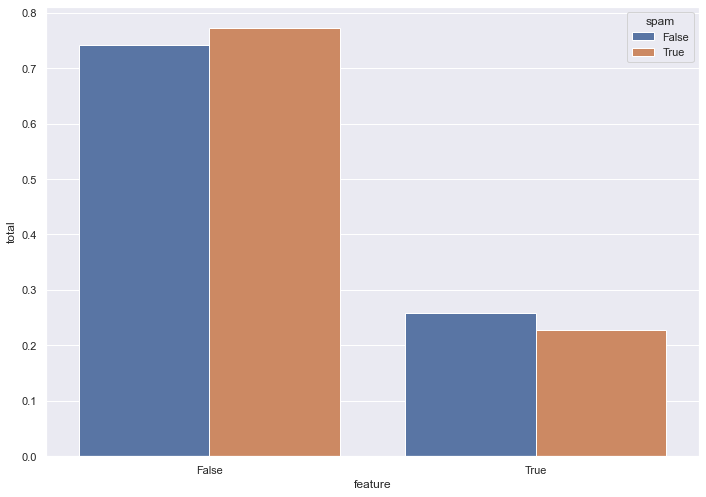

In [33]:
clean_df['creator_has_orcid'] = df.apply(lambda x: has_orcid(x['creators']), axis=1)
barplot_by_spam(clean_df, 'creator_has_orcid')

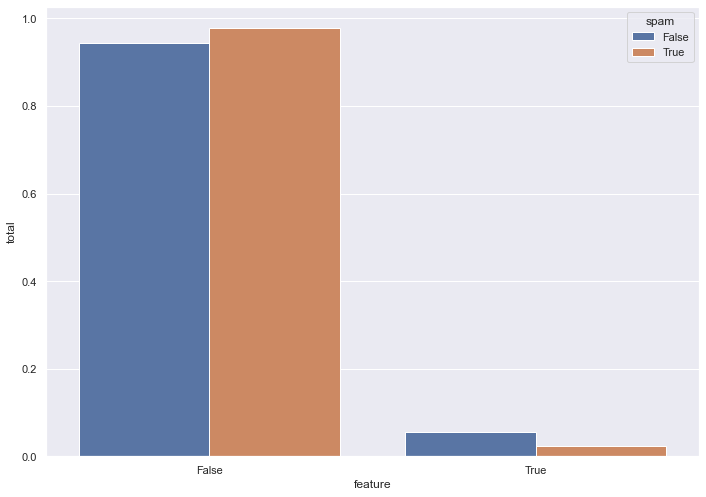

In [34]:
clean_df['creator_has_affiliation'] = df.apply(lambda x: has_affiliation(x['creators']), axis=1)
barplot_by_spam(clean_df, 'creator_has_affiliation')

## Resource type

In [35]:
def resource_type(resource_type):
    return resource_type.get('type')

def resource_type_full(resource_type):
    return f"{resource_type.get('type')}-{resource_type.get('subtype')}"

In [36]:
clean_df['type'] = df.apply(lambda x: resource_type(x['resource_type']), axis=1)
clean_df.type.value_counts()

publication     948770
image           556016
software        101787
dataset          78165
presentation     18835
poster            6942
other             6546
video             2785
lesson            2459
Name: type, dtype: int64

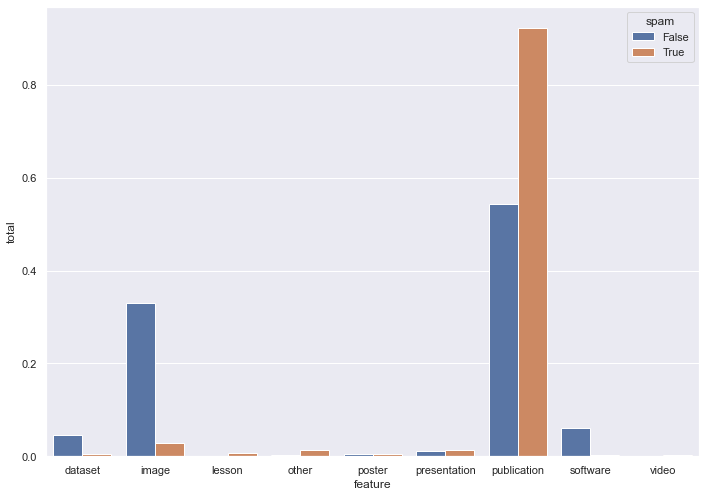

In [37]:
barplot_by_spam(clean_df, 'type')

In [38]:
clean_df['type_full'] = df.apply(lambda x: resource_type_full(x['resource_type']), axis=1)
clean_df.type_full.value_counts()

publication-article                  809083
image-photo                          279335
image-figure                         271469
software-None                        101787
dataset-None                          78165
publication-conferencepaper           44659
publication-taxonomictreatment        39544
presentation-None                     18835
publication-other                     12146
publication-report                     8870
publication-book                       8518
publication-section                    7057
poster-None                            6942
other-None                             6546
publication-deliverable                5187
image-drawing                          4240
publication-thesis                     4027
publication-preprint                   3679
publication-workingpaper               3383
video-None                             2785
lesson-None                            2459
publication-technicalnote              1217
image-other                     

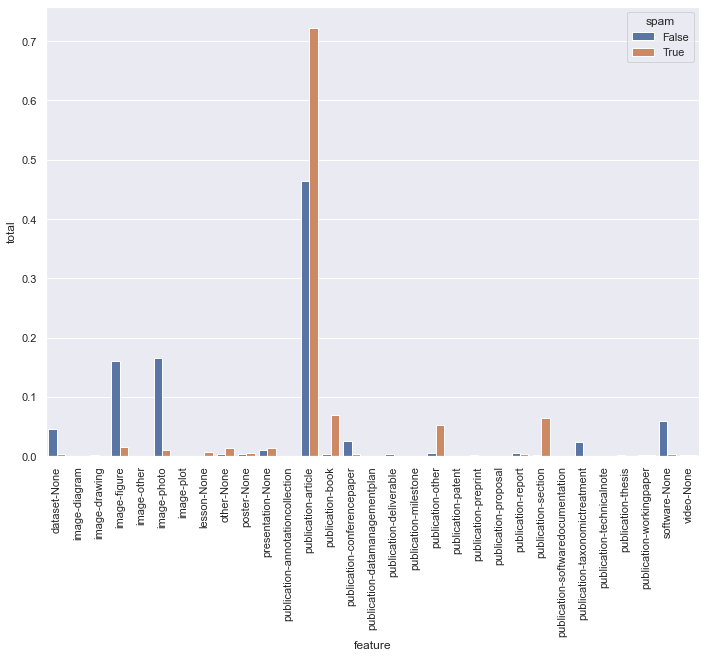

In [39]:
barplot_by_spam(clean_df, 'type_full', True)

## License

In [40]:
clean_df.license.value_counts()

cc-zero             524472
CC-BY-4.0           406652
CC-BY-SA-4.0        276119
notspecified        201620
cc-by               108138
                     ...  
Apache-1.0               1
canada-crown             1
CDLA-Sharing-1.0         1
CATOSL-1.1               1
AFL-2.0                  1
Name: license, Length: 205, dtype: int64

In [41]:
top_licenses = ["notspecified", "cc-zero", "CC-BY-4.0", "CC-BY-SA-4.0", "cc-by"]
def has_license(license):
    if not license:
        return "no-license"
    else:
        for top_license in top_licenses:
            if license == top_license:
                return license
        return "other"

In [42]:
clean_df['has_license'] = df.apply(lambda x: has_license(x['license']), axis=1)

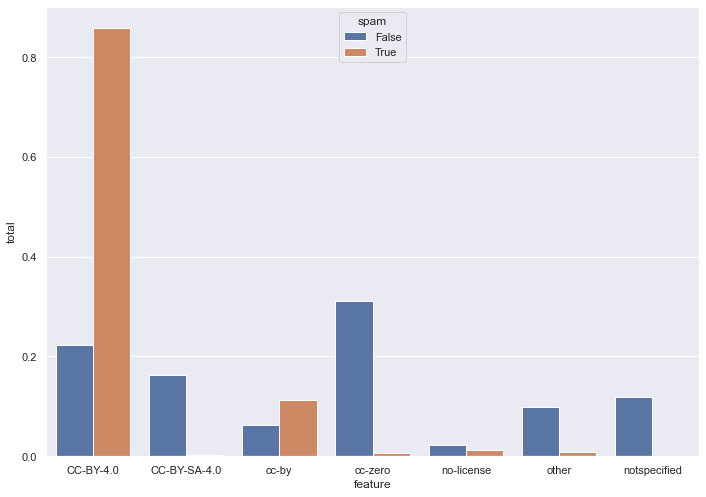

In [43]:
barplot_by_spam(clean_df, 'has_license')

## Title and description

In [44]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [45]:
import re
def count_words(text):
    return len(re.findall(r'\w+', text))

In [46]:
clean_df['num_words_title'] = df.apply(lambda x: count_words(x['title']), axis=1)
clean_df.num_words_title.value_counts().sort_index()

0           21
1        19370
2        31248
3        60950
4       259178
         ...  
305          3
387          1
404          1
1264         1
1862         1
Name: num_words_title, Length: 190, dtype: int64

In [47]:
clean_df.loc[(clean_df.num_words_title >= 25) & (clean_df.num_words_title < 30), "num_words_title"] = 25
clean_df.loc[(clean_df.num_words_title >= 30) & (clean_df.num_words_title < 35), "num_words_title"] = 30
clean_df.loc[(clean_df.num_words_title >= 35) & (clean_df.num_words_title < 40), "num_words_title"] = 35
clean_df.loc[(clean_df.num_words_title >= 40) & (clean_df.num_words_title < 45), "num_words_title"] = 40
clean_df.loc[(clean_df.num_words_title >= 45) & (clean_df.num_words_title < 50), "num_words_title"] = 45
clean_df.loc[clean_df.num_words_title >= 50, "num_words_title"] = 50
clean_df.num_words_title.value_counts().sort_index()

0         21
1      19370
2      31248
3      60950
4     259178
5     149325
6     127870
7     110934
8      90119
9      84990
10     75860
11     71495
12     73012
13     60420
14     51856
15     48705
16     43708
17     37813
18     34479
19     31930
20     27844
21     23000
22     20427
23     17985
24     16407
25     50026
30     31347
35     26730
40     19642
45     12535
50     13079
Name: num_words_title, dtype: int64

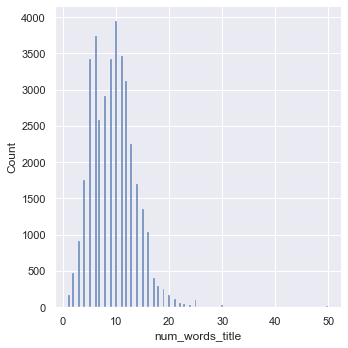

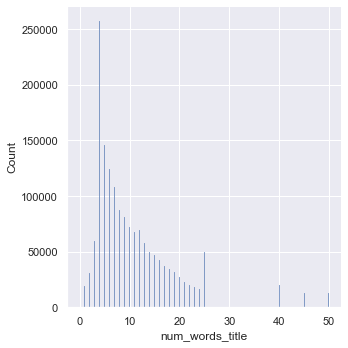

In [48]:
nwt_spam_df, nwt_ham_df = spam_ham_df(clean_df)
sns.displot(nwt_spam_df, x="num_words_title")
sns.displot(nwt_ham_df, x="num_words_title")

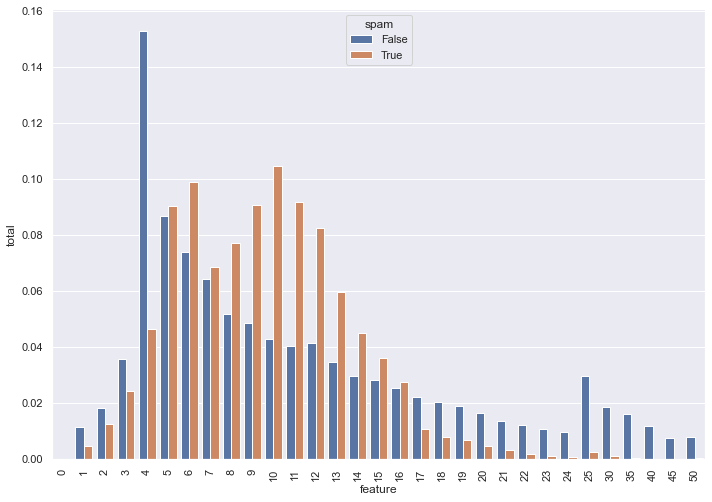

In [49]:
barplot_by_spam(clean_df, 'num_words_title', True)

In [50]:
clean_df['num_words_description'] = df.apply(lambda x: count_words(strip_tags(x['description'])), axis=1)
clean_df.num_words_description.value_counts()

2       515026
7       281116
10       22544
12       19468
9        11896
         ...  
3286         1
3732         1
6805         1
7383         1
2725         1
Name: num_words_description, Length: 3485, dtype: int64

In [51]:
clean_df.loc[(clean_df.num_words_description >= 10) 
             & (clean_df.num_words_description < 15), "num_words_description"] = 10
clean_df.loc[(clean_df.num_words_description >= 15) 
             & (clean_df.num_words_description < 20), "num_words_description"] = 15
clean_df.loc[(clean_df.num_words_description >= 20) 
             & (clean_df.num_words_description < 30), "num_words_description"] = 20
clean_df.loc[(clean_df.num_words_description >= 30) 
             & (clean_df.num_words_description < 40), "num_words_description"] = 30
clean_df.loc[(clean_df.num_words_description >= 40) 
             & (clean_df.num_words_description < 50), "num_words_description"] = 40
clean_df.loc[(clean_df.num_words_description >= 50) 
             & (clean_df.num_words_description < 75), "num_words_description"] = 50
clean_df.loc[(clean_df.num_words_description >= 75) 
             & (clean_df.num_words_description < 100), "num_words_description"] = 75
clean_df.loc[(clean_df.num_words_description >= 100) 
             & (clean_df.num_words_description < 150), "num_words_description"] = 100
clean_df.loc[(clean_df.num_words_description >= 150) 
             & (clean_df.num_words_description < 200), "num_words_description"] = 150
clean_df.loc[(clean_df.num_words_description >= 200) 
             & (clean_df.num_words_description < 300), "num_words_description"] = 200
clean_df.loc[(clean_df.num_words_description >= 300) 
             & (clean_df.num_words_description < 400), "num_words_description"] = 300
clean_df.loc[(clean_df.num_words_description >= 400) 
             & (clean_df.num_words_description < 500), "num_words_description"] = 400
clean_df.loc[(clean_df.num_words_description >= 500) 
             & (clean_df.num_words_description < 1000), "num_words_description"] = 500
clean_df.loc[(clean_df.num_words_description >= 1000) 
             & (clean_df.num_words_description < 2000), "num_words_description"] = 1000
clean_df.loc[(clean_df.num_words_description >= 2000) 
             & (clean_df.num_words_description < 3000), "num_words_description"] = 2000
clean_df.loc[clean_df.num_words_description >= 3000, "num_words_description"] = 3000
clean_df.num_words_description.value_counts().sort_index()

0          503
1         4380
2       515026
3        11605
4        11467
5         8169
6        10011
7       281116
8        11409
9        11896
10       72112
15       44767
20       84979
30       80119
40       61558
50       90369
75       60170
100      97347
150      95955
200      87317
300      31766
400      12375
500      18893
1000     14013
2000      3916
3000      1067
Name: num_words_description, dtype: int64

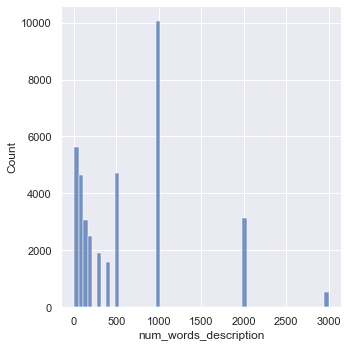

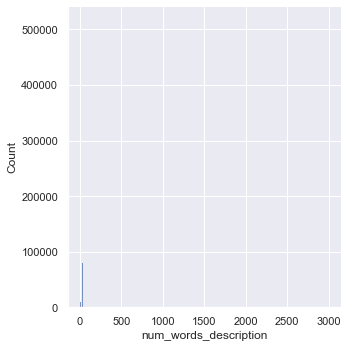

In [52]:
nwd_spam_df, nwd_ham_df = spam_ham_df(clean_df)
sns.displot(nwd_spam_df, x="num_words_description")
sns.displot(nwd_ham_df, x="num_words_description")

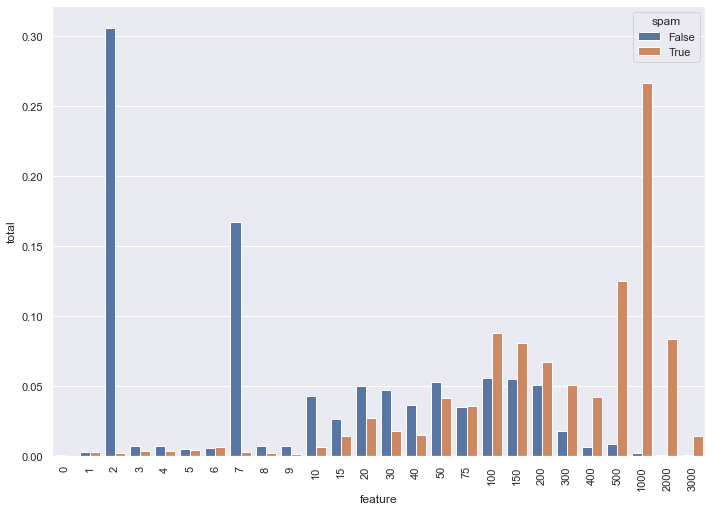

In [53]:
barplot_by_spam(clean_df, 'num_words_description', True)

In [54]:
clean_df.head()

,keywords,title,access_right,files,description,communities,license,spam,recid,creators,...,has_image,num_communities,num_creators,creator_has_orcid,creator_has_affiliation,type,type_full,has_license,num_words_title,num_words_description
0,None,The Geodynamic World Builder,open,"[{'filetype': 'pdf', 'size': 808178, 'filename...",<p>The Geodynamic World Builder (GWB) is an op...,[geodynamics],LGPL-2.1-or-later,False,3900603,"[{'orcid': '0000-0003-0035-7723', 'affiliation...",...,False,1,1,True,True,software,software-None,other,4,100
1,"[Alignment, Ambiguous characters, InDel, Maxim...",Evidence of Absence Treated as Absence of Evid...,open,"[{'filetype': 'fasta', 'size': 32888, 'filenam...","<p>Enclosed are the figures, tables, and suppl...",None,CC-BY-4.0,False,3363990,"[{'orcid': '0000-0001-9858-4515', 'affiliation...",...,False,0,3,True,True,publication,publication-article,CC-BY-4.0,30,75
2,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",FIGURE 13 in Exploring species diversity and h...,open,"[{'filetype': 'png', 'size': 7640839, 'filenam...",FIGURE 13. Mines of Phyllonorycter spp. from t...,[biosyslit],notspecified,False,3363503,"[{'name': 'Kirichenko, Natalia'}, {'name': 'Tr...",...,True,1,7,False,False,image,image-figure,notspecified,24,75
3,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",FIGURE 3 in Two new species of Panaietis (Cope...,open,"[{'filetype': 'png', 'size': 299892, 'filename...","FIGURE 3. Panaietis bobocephala sp. nov., adul...",[biosyslit],notspecified,False,3363619,"[{'name': 'Uyeno, Daisuke'}]",...,True,1,1,False,False,image,image-figure,notspecified,21,50
4,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",A new species of the genus Criotettix Bolivar ...,closed,[],"Zhang, Yu-Long, Li, Xin-Jiang, Zhi, Yong-Chao ...",[biosyslit],None,False,3363729,"[{'name': 'Zhang, Yu-Long'}, {'name': 'Li, Xin...",...,False,1,3,False,False,publication,publication-article,no-license,14,30


# Preprocess

In [96]:
from unidecode import unidecode
import string

trans_table = str.maketrans(string.punctuation, ' '*len(string.punctuation))

def merge_and_clean_text(keywords, title, description):
    text = " ".join(keywords) if keywords else ""
    # Decode text (after striping HTML tags if needed), then remove punctuation
    text = unidecode(text).translate(trans_table) + " " + \
            strip_tags(unidecode(title)).translate(trans_table) + " " + \
            strip_tags(unidecode(description)).translate(trans_table)

    return text.lower().strip()


# For text_4000

def _truncate(text, max_length):
    parts = text.translate(trans_table).split(" ")
    if len(parts) < max_length:
        return text
    else:
        return ' '.join(parts[:max_length])

def merge_clean_and_truncate_text(keywords, title, description,
                                  keywords_length=100, title_length=400, description_length=3500,
                                  max_text_length = 4000):
    _keywords = " ".join(keywords) if keywords else ""
    # Decode text (after striping HTML tags if needed), then remove punctuation
    _keywords = _truncate(unidecode(_keywords), keywords_length)
    _title = _truncate(strip_tags(unidecode(title)), title_length)
    _description = _truncate(strip_tags(unidecode(description)), description_length)
        
    text = _keywords + " " + _title + " " + _description
   
    safeguard = len(text.split(' '))
    if safeguard > max_text_length:
        print(f"Failed. len f{safeguard}")
    
    return text.lower().strip()
    

In [97]:
clean_df['text'] = df.apply(
    lambda x: merge_and_clean_text(x['keywords'], x['title'], x['description']), axis=1)

In [98]:
clean_df['text_4000'] = df.apply(
    lambda x: merge_clean_and_truncate_text(x['keywords'], x['title'], x['description']), axis=1)

In [99]:
clean_df.head()

,keywords,title,access_right,files,description,communities,license,spam,recid,creators,...,num_creators,creator_has_orcid,creator_has_affiliation,type,type_full,has_license,num_words_title,num_words_description,text_4000,text
0,None,The Geodynamic World Builder,open,"[{'filetype': 'pdf', 'size': 808178, 'filename...",<p>The Geodynamic World Builder (GWB) is an op...,[geodynamics],LGPL-2.1-or-later,False,3900603,"[{'orcid': '0000-0003-0035-7723', 'affiliation...",...,1,True,True,software,software-None,other,4,100,the geodynamic world builder the geodynamic wo...,the geodynamic world builder the geodynamic wo...
1,"[Alignment, Ambiguous characters, InDel, Maxim...",Evidence of Absence Treated as Absence of Evid...,open,"[{'filetype': 'fasta', 'size': 32888, 'filenam...","<p>Enclosed are the figures, tables, and suppl...",None,CC-BY-4.0,False,3363990,"[{'orcid': '0000-0001-9858-4515', 'affiliation...",...,3,True,True,publication,publication-article,CC-BY-4.0,30,75,alignment ambiguous characters indel maximum l...,alignment ambiguous characters indel maximum l...
2,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",FIGURE 13 in Exploring species diversity and h...,open,"[{'filetype': 'png', 'size': 7640839, 'filenam...",FIGURE 13. Mines of Phyllonorycter spp. from t...,[biosyslit],notspecified,False,3363503,"[{'name': 'Kirichenko, Natalia'}, {'name': 'Tr...",...,7,False,False,image,image-figure,notspecified,24,75,biodiversity taxonomy animalia arthropoda inse...,biodiversity taxonomy animalia arthropoda inse...
3,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",FIGURE 3 in Two new species of Panaietis (Cope...,open,"[{'filetype': 'png', 'size': 299892, 'filename...","FIGURE 3. Panaietis bobocephala sp. nov., adul...",[biosyslit],notspecified,False,3363619,"[{'name': 'Uyeno, Daisuke'}]",...,1,False,False,image,image-figure,notspecified,21,50,biodiversity taxonomy animalia arthropoda maxi...,biodiversity taxonomy animalia arthropoda maxi...
4,"[Biodiversity, Taxonomy, Animalia, Arthropoda,...",A new species of the genus Criotettix Bolivar ...,closed,[],"Zhang, Yu-Long, Li, Xin-Jiang, Zhi, Yong-Chao ...",[biosyslit],None,False,3363729,"[{'name': 'Zhang, Yu-Long'}, {'name': 'Li, Xin...",...,3,False,False,publication,publication-article,no-license,14,30,biodiversity taxonomy animalia arthropoda inse...,biodiversity taxonomy animalia arthropoda inse...


In [100]:
clean_df.columns

Index(['keywords', 'title', 'access_right', 'files', 'description',
       'communities', 'license', 'spam', 'recid', 'creators', 'resource_type',
       'num_keywords', 'num_files', 'has_image', 'num_communities',
       'num_creators', 'creator_has_orcid', 'creator_has_affiliation', 'type',
       'type_full', 'has_license', 'num_words_title', 'num_words_description',
       'text_4000', 'text'],
      dtype='object')

In [101]:
# Chained operation because we do not drop `inplace`

to_drop = [
    "keywords", "title", "files", "description", "communities", "license", "creators", "resource_type"
]
for column in to_drop:
    clean_df = clean_df.drop(column, axis='columns')
clean_df.head()

,access_right,spam,recid,num_keywords,num_files,has_image,num_communities,num_creators,creator_has_orcid,creator_has_affiliation,type,type_full,has_license,num_words_title,num_words_description,text_4000,text
0,open,False,3900603,0,3,False,1,1,True,True,software,software-None,other,4,100,the geodynamic world builder the geodynamic wo...,the geodynamic world builder the geodynamic wo...
1,open,False,3363990,6,5,False,0,3,True,True,publication,publication-article,CC-BY-4.0,30,75,alignment ambiguous characters indel maximum l...,alignment ambiguous characters indel maximum l...
2,open,False,3363503,8,1,True,1,7,False,False,image,image-figure,notspecified,24,75,biodiversity taxonomy animalia arthropoda inse...,biodiversity taxonomy animalia arthropoda inse...
3,open,False,3363619,8,1,True,1,1,False,False,image,image-figure,notspecified,21,50,biodiversity taxonomy animalia arthropoda maxi...,biodiversity taxonomy animalia arthropoda maxi...
4,closed,False,3363729,7,0,False,1,3,False,False,publication,publication-article,no-license,14,30,biodiversity taxonomy animalia arthropoda inse...,biodiversity taxonomy animalia arthropoda inse...


In [102]:
clean_df.columns

Index(['access_right', 'spam', 'recid', 'num_keywords', 'num_files',
       'has_image', 'num_communities', 'num_creators', 'creator_has_orcid',
       'creator_has_affiliation', 'type', 'type_full', 'has_license',
       'num_words_title', 'num_words_description', 'text_4000', 'text'],
      dtype='object')

In [103]:
output_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_processed_full.jsonl"
clean_df.to_json(output_filepath, orient='records', lines=True)

In [106]:
output_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_processed_text.jsonl"
clean_df[['recid', 'spam', 'text']].to_json(output_filepath, orient='records', lines=True)

In [107]:
output_filepath = f"{base_path}/datasets/zenodo_open_metadata_2020-11-14_processed_text_4000.jsonl"
clean_df[['recid', 'spam', 'text_4000']].to_json(output_filepath, orient='records', lines=True)